# Distributions of node-based statistics

> This notebook was used to generate Figure 3. It shows that systematic differences between algorithms, which we capture in the bimodality statistic, has a large effect on gene age estimation.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.lines as mlines
from LECA.plotting import histLinePlot
%matplotlib inline

In [2]:
nodestats = pd.read_csv("nodeStats_HUMAN.csv",index_col=0,na_values=[None])
nodestats.head()

,NodeError,Bimodality
Q8TEA1,1.307692,-0.047619
A6NIH7,1.410256,0.555556
Q96HJ5,3.681818,3.266667
O94913,2.974359,-0.253968
P37837,0.307692,0.055556


### Correlation between node error and the bimodality statistic

In [3]:
nodestats.corr("spearman")

,NodeError,Bimodality
NodeError,1.000000,0.647966
Bimodality,0.647966,1.000000


### Distribution of the node error statistic

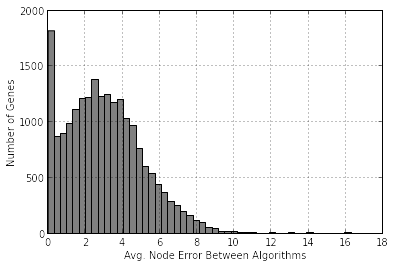

In [4]:
nodestats["NodeError"].hist(bins=50,color='grey')
plt.ylabel("Number of Genes")
plt.xlabel("Avg. Node Error Between Algorithms")

### Distribution of the bimodality statistic
> Note the positive skew. The bimodality statisitc is defined as the average node error between the "old" and "young" groups of the algorithms minus the average node error within those groups. So the positive skew means that this grouping is capturing a true clustering with respect to node error. Genes falling below zero here are bimodal with respect to some other grouping, but are clearly in the minority

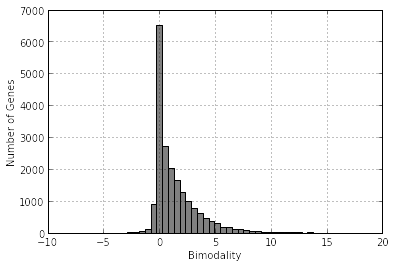

In [5]:
nodestats["Bimodality"].hist(bins=50,color='grey')
plt.ylabel("Number of Genes")
plt.xlabel("Bimodality")

#plt.savefig("Polarization_distribution.svg")

### Percent of proteins that are split bimodally between the "young" and "old" algorithm groups. Compare with those split between other groupings

In [6]:
# Those split between other groups will have bimodality score <0 (greater within group difference
# than between)

len(nodestats[nodestats["Bimodality"] < 0])/float(len(nodestats))

0.17836886368081362

In [7]:
# Bimodal or neutral genes (score greater than or equal to 0)

len(nodestats[nodestats["Bimodality"] >= 0])/float(len(nodestats))

0.7922452571875611

### Get polarization statistics for each bin in node error histogram
> I made a module to do the binning called histLinePlot. It makes a dataframe with the mean,standard deviation, and variance for the bimodality statistic in each bin in the node error histogram. The plots below visualize these statistics.The clear takeaway is that genes with more node error are more bimodal with respect to the "old" and "young" algorithms. There are therefore systematic differences between these algorithms that make determination of a true age very difficult for a substantial subset of genes

In [8]:
%%capture
stats = histLinePlot.getLineScoreStats(nodestats,"Bimodality","NodeError")

In [9]:
stats.head()

,mean,stanDev.,var
0.17,0.002160,0.044902,0.002016
0.51,0.031166,0.152390,0.023223
0.85,0.095533,0.319595,0.102141
1.19,0.180495,0.393224,0.154625
1.53,0.304606,0.484080,0.234333


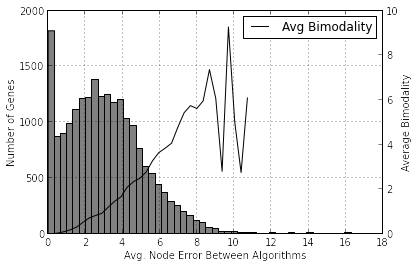

In [10]:
fig,ax1 = plt.subplots()
nodestats["NodeError"].hist(bins=50,color='grey')
ax2 = ax1.twinx()
ax2.plot(stats.index,stats['mean'],'black',label="Avg Bimodality")
ax1.set_ylabel("Number of Genes")
ax1.set_xlabel("Avg. Node Error Between Algorithms")
ax2.set_ylabel("Average Bimodality")

plt.legend()

plt.savefig("nodeError-polarization_correlation.svg")

### The scatter in the average bimodality of larger bins is due to small sample size and high variance

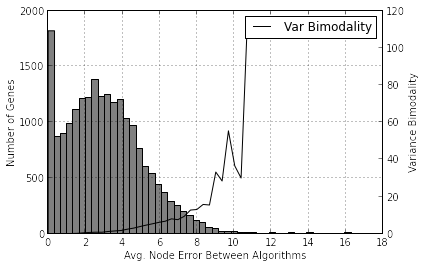

In [11]:
fig,ax1 = plt.subplots()
nodestats["NodeError"].hist(bins=50,color='grey')
ax2 = ax1.twinx()
ax2.plot(stats.index,stats['var'],'black',label="Var Bimodality")
ax1.set_ylabel("Number of Genes")
ax1.set_xlabel("Avg. Node Error Between Algorithms")
ax2.set_ylabel("Variance Bimodality")

plt.legend()

#plt.savefig("nodeError-polarization_correlation.svg")

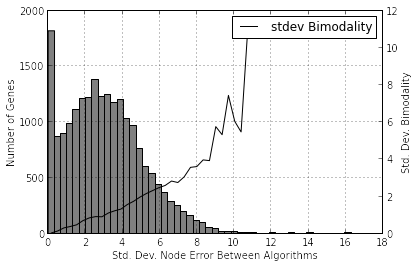

In [12]:
fig,ax1 = plt.subplots()
nodestats["NodeError"].hist(bins=50,color='grey')
ax2 = ax1.twinx()
ax2.plot(stats.index,stats['stanDev.'],'black',label="stdev Bimodality")
ax1.set_ylabel("Number of Genes")
ax1.set_xlabel("Std. Dev. Node Error Between Algorithms")
ax2.set_ylabel("Std. Dev. Bimodality")

plt.legend()

#plt.savefig("nodeError-polarization_correlation.svg")